<a href="https://colab.research.google.com/github/lauragarevalo/Matematicas-para-el-aprendizaje-de-m-quinas/blob/main/SVMBasic_Laura_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


Optimized a step.
Optimized a step.
Optimized a step.


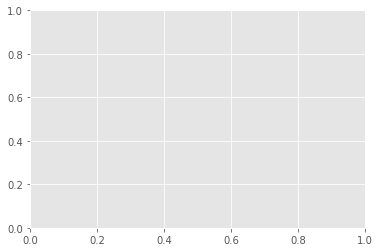

In [2]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)


In [3]:
svm1.predict([7,3.5])

1.0



---

**Solución**

# Banknote Authentication Dataset




**1)** En el dataset de banknote authentication se busca resolver un problema de clasificación binario, cuyo propósito es determinar si un billete es real o es falso, a partir de un conjunto de imágenes y sus caraterísticas.

**2)** Como se menciona en el repositorio, las features del dataset de banknote authentication son las siguientes:

*   Variance of Wavelet Transformed image (continuous): Hace referencia a la variación de las intensidades de los pixeles de la imagen de la transformada wavelet.
*   Skewness of Wavelet Transformed image (continuous): Mide la antisimetría de la distribución de los valores obtenidos al aplicar la transformada wavelet en la imagen (coeficientes de wavelet). Si el skewness es igual a cero, entonces es una distribución simétrica.
*   Curtosis of Wavelet Transformed image (continuous): Busca determinar la forma de la distribución de coeficientes wavelet.
*   Entropy of image (continuous): Mide la aleatoriedad de la frecuencia en el contenido de la imagen.

Las etiquetas del dataset están dadas por billetes auténticos representados por 0, y billetes falsos representados por 1.

**3) a)** Para ver que el dataset de banknote authentication es linealmente separable graficaremos en un espacio de dos dimensiones dos de las features del sistema. Para esto, emplearemos el código que se muestra a continuación.

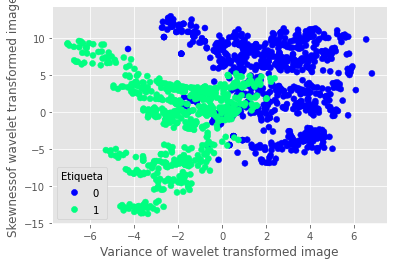

In [4]:
# Emplearemos la librería Pandas ya que esta se especializa en el manejo y análisis de estructuras de datos
# Esta librería nos permitirá cargar el dataset, como los datos están separados por comas podremos cargar el dataset como un archivo CVS (comma separated files)
import pandas as pd
import matplotlib.pyplot as plt
# Ahora cargaremos el dataset en un Dataframe que nos permitirá destacar las relaciones entre las variables de los datos.
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header=None)
# Luego asignaremos los nombres de cada columna según el feature correspondiente, donde la última columna corresponderá a las etiquetas.
data.columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
# Finalmente graficaremos los datos con dos de las características de estos.
fig, ax = plt.subplots()
# Graficaremos un diagrama de dispersión, mostrando la relación entre las variables Variance y Skewness.
scatter = ax.scatter(data["Variance"], data["Skewness"], c=data["Class"], cmap='winter')
ax.set_xlabel("Variance of wavelet transformed image")
ax.set_ylabel("Skewnessof wavelet transformed image")
legend = ax.legend(*scatter.legend_elements(), title="Etiqueta")
ax.add_artist(legend)
plt.show()

Como podemos observar en la gráfica algunos de los datos se sobreponen, por lo cual no podríamos afirmar que el dataset es linealmente separable de forma estricta, sin embargo, hay unas regiones que sí pueden ser linealmente separables, por lo tanto podríamos usar modelos lineales con una precisión aceptable. Sin embargo, es posible implementar otros métodos para determinar si el dataset es linealmente separable, en este caso implementaremos el algoritmo de Perceptron debido a que este converge únicamente para datasets linealmente separables, así, si el algoritmo converge para el dataset de banknote authentication esto implicaría que este es linealmente separable.

In [5]:
#Primero descargaremos el dataset del link y lo guardaremos como un arcivo CSV
import numpy as np
import urllib.request
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
#Descargamos los contenidos del dataset
response = urllib.request.urlopen(url)
#Cargamos los datos de la línea anterior en un arreglo numpy
data = np.loadtxt(response, delimiter=',')
#Guardamos el arreglo anterior como un archivo CSV
np.savetxt('banknote_authentication.csv', data, delimiter=',')

In [6]:
#Implementación de Perceptrón
import numpy as np
from sklearn.model_selection import train_test_split



#Definimos una función que nos devuelva 1 si la entrada es >=0 o -1 si la entrada es <0
def step_func(z):
  return np.where(z>=0, 1, -1)

#Implementamos el algoritmo de Perceptron
def perceptron(X, y, lr, epochs):
  m, n = X.shape
  # X : inputs
  # y : labels
  # lr : learning rate (controla el tamaño de cada paso en las iteraciones)
  # epochs : número de iteraciones
  # m : número de ejemplos de entrenamiento
  # n : número de features
  
  #El algoritmo de Perceptron busca aprender un conjunto de "pesos" que pueden ser usados para hacer predicciones sobre datos nuevos.
  # Almacenaremos estos "pesos" en el siguiente vector theta
  theta = np.zeros((n+1,1))
  #Creamos una lista vacía para almacenar la cantidad de ejemplos que fueron mal clasificados en cada iteración
  n_miss_list =[]
  #Entrenamiento
  for epoch in range (epochs):
    #Creamos una variable para almacenar los mal clasificados
    n_miss = 0
    #loop para cada ejemplo
    for idx, x_i in enumerate(X):
      #Usaremos un término bias, este es una constante que se añade a la suma de las entradas por peso en un modelo lineal
      #Este término permite al modelo variar los valores arriba o abajo, lo cual puede ser útil si los tatos tienen algún desbalance.
      #Insertamos 1 como bias, x0=1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      
      #Calculamos la predicción
      y_hat = step_func(np.dot(x_i.T, theta))
      
      #Si el ejemplo es mal clasificado actualizamos
      if (np.squeeze(y_hat) - y[idx]) != 0:
        theta += lr*((y[idx] - y_hat)*x_i)
        n_miss += 1
    
    n_miss_list.append(n_miss)
  return theta, n_miss_list

#Cargamos los datos del dataset 
data = np.genfromtxt('banknote_authentication.csv', delimiter=',')
#Separamos features y labels

X = data[:,:-1]
y = data[:,-1]

#Dividimos el dataset entre datos de entrenamiento (80%) y datos de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0) 

#Definimos el learning rate y el número de iteraciones
lr=0.1
epochs=100

#Entrenamos el algoritmo de Perceptron con los datos de entrenamiento
theta, n_miss_list = perceptron(X_train, y_train, lr, epochs)

#Usamos los parámetros aprendidos para hacer predicciones sobre los datos de prueba
X_test_bias = np.insert(X_test, 0, 1, axis=1)
y_pred = np.sign(np.dot(X_test_bias, theta))

#Evaluamos la precisión de Perceptron sobre los datos de prueba
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3307900826446281


Observamos que la precisión del método es de solo el 33%, lo que implica que este modelo no se ejecuta muy bien para este dataset. A continuación implementaremos Perceptron de otra manera. 

In [7]:
import numpy as np

class myPerceptron:
    
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    # Función de activación
    def activation(self, z):
        return np.heaviside(z, 0) #
    
    def fit(self, X, y):
        n_features = X.shape[1]
        
        # Inicializamos pesos y bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iteramos hasta el npumero de epochs
        for epoch in range(self.epochs):
            
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Encontramos el producto punto y añadimos el bias
                y_pred = self.activation(z) # Pasamos por la función de activación
                
                #Actualizamos pesos y bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargamos el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = np.genfromtxt(url, delimiter=",", dtype=np.float32)

# Separamos features (X) y labels (y)
X = data[:,:-1]
y = data[:,-1]

# Dividimos el dataset en training y testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creamos un objeto de perceptron con una learning rate de 0.1 y 100 epochs
perceptron = myPerceptron(learning_rate=0.1, epochs=100)

# Entrenamos el perceptron sobre los datos de entrenamiento
perceptron.fit(X_train, y_train)

# Hacemos predicciones sobre los datos de prueba
y_pred = perceptron.predict(X_test)

# Evaluamos la efectividad del perceptron sobre los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9927272727272727


Se observa que este modelo funciona de mejor manera para este dataset, dándonos una precisión dek 99.3%, lo que indica que el dataset es linealmente separable. Adicionalmente, a partir de la librería 'sklearn' es posible importar el algoritmo de Perceptron, como se muestra a continuación.

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

def perceptron_test(X_train, y_train):
  clf = Perceptron()

  # Tomamos los datos de entrenamiento para emplearlos en el entrenamiento del modelo
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  print(score)

In [10]:
# Test del percetron 
perceptron_test(X_test,y_test)

0.9781818181818182


Esto nos indica que el dataset es linealmente separable.

**3) b)** A partir de la información suministrada por la documentación del dataset no es posible determinar si los datos han sido escogidos de manera aleatoria.

**c)** La cantidad de datos necesarios para determinar si un conjunto de datos es suficiente depende directamente de la complejidad del problema, en este caso, teniendo en cuenta que al entrenar el dataset obtenemos niveles altos de precisión podríamos decir que se cuenta con un número adecuado de muestras.

**4)** Debido a que el código dado no funciona adecuadamente para sistemas multidimensionales haremos una implementación de SVM distinta para usarla posteriormente en cada uno de los datasets, a continuación se evidencia el código junto con su explicación en comentarios. 

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class SVM:

    def __init__(self, C = 1.0):
        # C = término de error
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function
    def hingeloss(self, w, b, x, y):
        # Término de regularización
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Término de optimización
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # Calculamos la pérdida de la pérdida
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Número de features en X
        number_of_features = X.shape[1]

        # Número de samples en X
        number_of_samples = X.shape[0]

        c = self.C

        # Creamos ids desde 0 a number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Mezclamos las muestras aleatoriamente
        np.random.shuffle(ids)

        # creamos arreglo de ceros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Logica Gradiente en Descenso
        for i in range(epochs):
            # Calculamos Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Juntamos todas las pérdidas
            losses.append(l)
            
            # Empezamos desde 0 hasta el número de muestras con batch_size como el intervalo
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculamos los gradientes

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Actualizamos pesos y bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b #
        return np.sign(prediction)
  


**5)** A continuación aplicaremos el código anterior al dataset que estamos trabajando.

In [19]:
# Cargamos el dataset
data_banknote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)
#Nombramos las columnas del mismo
data_banknote.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
data_banknote["class"] = data_banknote["class"].replace([0],-1)
# Separamos las features de las etiquetas 
X_bdata = data_banknote[["variance", "skewness", "curtosis", "entropy"]]
#Etiquetas
y_bdata = data_banknote["class"]

bSVM = SVM()
#Separamos los datos entre datos de entrenamiento y datos de prueba
X_train, X_test,y_train, y_test = train_test_split(X_bdata, y_bdata,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)
#Entrenamos la SVM
bSVM.fit(X_train.to_numpy(), y_train.to_numpy()); 

#Ahora evaluamos el rendimiento
predicted_data = bSVM.predict(X_test.to_numpy())

errors = len([i for i in (predicted_data - y_test) if i != 0]) 

score = (len(y_test) - errors)/len(y_test)
print(score)


0.9890909090909091


Como se observa, la implementación del SVM nos brinda una precisión del 98.9% lo cual nos indica que el método está funcionando apropiadamente.
 
**6)** Para entrenar la SVM anteriormente dividimos el dataset en dos subconjuntos de datos, uno de training (80%) y otro de testing (20%), sin embargo, para garantizar generalización es necesario tener tres conjuntos de datos, de entrenamiento, de validación y de prueba. No obstante, debido a que los datasets con los cuales estamos trabajando tienen un conjunto de datos reducido, realizaremos crossvalidation para observar la generalización del modelo. Crossvalidation es una técnica usada en Machine Learning para evaluar el rendimiento de un modelo cuando se tiene un número limitado de datos. La idea es dividir el dataset en múltiples subconjuntos, usar algunos de estos para entrenar el modelo y el resto para probarlo. Este proceso se repite varias veces tal que cada subconjunto llegue a ser de testing al menos una vez, luego se saca el promedio de los resultados para obtener una mejor estimación del comportamiento del modelo.

In [29]:
#Creamos una lista vacía 'perf' para guardar el rendimiento de cada iteración
perf = []
for _ in range(0,10):
  # Creamos la SVM 
  bank_SVM = SVM()
  #Partimos los datos usando sklearn 
  X_train, X_test,y_train, y_test = train_test_split(X_bdata, y_bdata,
                                    random_state=101, 
                                    test_size=0.25, 
                                    shuffle=True)
  #Entrenamos la SVM
  bank_SVM.fit(X_train.to_numpy(), y_train.to_numpy()); 

  #Ahora evaluamos el rendimiento
  predicted_data = bank_SVM.predict(X_test.to_numpy())

  errors = len([i for i in (predicted_data - y_test) if i != 0]) 

  score = (len(y_test) - errors)/len(y_test)
  perf.append(score)

In [31]:
#Calculamos la suma de los resultados del rendimiento y lo dividimos por su longitud para calcular el promedio
total_score = sum(perf)/len(perf)
print(total_score)

0.9889212827988336


Debido a que obtenemos un promedio de rendimiento mayor al 98% tenemos garantía de generalización.

# Occupancy Detection Dataset

**1)** El dataset contiene datos de distintos sensores en una habitación. El problema que se busca resolver es un problema de clasificación binario cuyo propósito es determinar si una habitación está o no ocupada. 

**2)** Como se menciona en el repositorio, las features del dataset son las siguientes:

* Date time: La fecha y la hora de la toma de medida.
* Temperature: En Celcius.
* Relative Humidity: Porcentaje de humedad relativa.
* Light: Nivel de luz en lux.
* CO2: Nivel de CO2 en partes por millón (ppm).
* Humidity Ratio: Radio de la masa de vapor de agua presente en el aire a la masa de aire seco.

Las etiquetas del dataset están dadas por el dato de Occupancy, donde se toma la variable binaria, 0 si la habiración está ocupada y 1 si no lo está.

**3) a)** Para ver que el dataset es linealmente separable usaremos el algoritmo de perceptrón de la misma forma que para el anterior dataset.




In [13]:
#Inicialmente cargamos el dataset
#Para descargar el archivo tipo Zip hay que hacemos el siguiente procedimiento
import urllib
import zipfile

# Descargamos y descomprimos los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
extract_dir = "occupancy"

#Descargamos el archivo desde la URL especificada
zip_path, _ = urllib.request.urlretrieve(url)
#Descomprimimos el archivo y descargamos los datos
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)

In [14]:
# El dataset coniene dos conjuntos de datos para entrenar y probar el modelo
# Creamos distintos dataframes

def occupancy_df_process(path):
  data = pd.read_csv(path, sep=",", 
            names=["columna","date","Temperature","Humidity",
                   "Light","CO2","HumidityRatio","Occupancy"])[1:]
                   
  #El número de columna de los datos es irrelevante por lo tanto no lo consideramos
  data = data.drop(["columna"],axis=1)

  data['date'] = data['date'].apply(lambda x: pd.to_datetime(x).to_julian_date())
  data["Light"] = data["Light"].astype(float)
  data["Temperature"] = data["Temperature"].astype(float)
  data["Humidity"] = data["Humidity"].astype(float)
  data["CO2"] = data["CO2"].astype(float)
  data["HumidityRatio"] = data["HumidityRatio"].astype(float)
  data["Occupancy"] = data["Occupancy"].astype(float)
  data["Occupancy"] = data["Occupancy"].replace([0],-1)

  # Features
  X_data = data[["Temperature","Humidity",
                   "Light","CO2","HumidityRatio"]]
  # Labels
  Y_data = data["Occupancy"]
  return X_data, Y_data

occupancy_train_X , occupancy_train_y = occupancy_df_process("occupancy/datatraining.txt")
occupancy_test_X , occupancy_test_y = occupancy_df_process("occupancy/datatest.txt")
occupancy_test2_X , occupancy_test2_y = occupancy_df_process("occupancy/datatest2.txt")

In [32]:
# Test del percetron usando el código implementado en la sección del Banknote dataset
perceptron_test(occupancy_train_X, occupancy_train_y )

0.9815792705391133


Esto nos indica que el dataset es linealmente separable.



**3) b)** A partir de la información suministrada por la documentación del dataset no es posible determinar si los datos han sido escogidos de manera aleatoria.

**c)** La cantidad de datos necesarios para determinar si un conjunto de datos es suficiente depende directamente de la complejidad del problema, en este caso, teniendo en cuenta que al entrenar el dataset obtenemos niveles altos de precisión podríamos decir que se cuenta con un número adecuado de muestras.


**4)** Usaremos el mismo código explicado en la sección del Banknote authentication dataset.

**5)** A continuación implementamos el SVM para el dataset que estamos trabajando.

In [33]:
#Tendremos en cuenta los datos de entrenamiento y de prueba del Occupancy detection dataset
OSVM = SVM()

# El dataset ya cuenta con la separación entre los datos de entrenamiento y de prueba

#Entrenamos la SVM con los datos de entrenamiento
OSVM.fit(occupancy_train_X.to_numpy(), occupancy_train_y.to_numpy())

#Es necesario evaluar el rendimiento con los datos de prueba
predicted_data = OSVM.predict(occupancy_test_X.to_numpy())

errors = len([i for i in (predicted_data - occupancy_test_y) if i != 0]) 
score = (len(occupancy_test_y) - errors)/len(occupancy_test_y)
print(score)

0.9793621013133208


Como se observa, la implementación del SVM nos brinda una precisión mayor al 97% lo cual nos indica que el método está funcionando apropiadamente.
 
 **6)** Para entrenar la SVM anteriormente dividimos el dataset en dos subconjuntos de datos, uno de training (80%) y otro de testing (20%), sin embargo, para garantizar generalización es necesario tener tres conjuntos de datos, de entrenamiento, de validación y de prueba. No obstante, debido a que los datasets con los cuales estamos trabajando tienen un conjunto de datos reducido, realizaremos crossvalidation para observar la generalización del modelo.

In [17]:
#Dataset a usar
#occupancy_train_X , occupancy_train_y 
#occupancy_test_X , occupancy_test_y 

#Nuevos datos
ocuppancy_X = occupancy_train_X.append(occupancy_test_X)
occupancy_y = occupancy_train_y.append(occupancy_test_y)

<ipython-input-17-08aff32485d4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocuppancy_X = occupancy_train_X.append(occupancy_test_X)
<ipython-input-17-08aff32485d4>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  occupancy_y = occupancy_train_y.append(occupancy_test_y)


In [34]:
for _ in range(0,10):
  # Separamos los datos
  X_train, X_test,y_train, y_test = train_test_split(ocuppancy_X, occupancy_y,
                                    random_state=104, 
                                    test_size=0.25, 
                                    shuffle=True)

  # Creamos la SVM 
  Occupancy_SVM = SVM()
  #Entrenamos la SVM
  Occupancy_SVM.fit(X_train.to_numpy(), y_train.to_numpy())

  #Ahora evaluamos el rendimiento
  predicted_data = Occupancy_SVM.predict(X_test.to_numpy())

  errors = len([i for i in (predicted_data -  y_test) if i != 0]) 
  score = (len(y_test) - errors)/len(y_test)
  perf.append(score)

In [36]:
total_score = sum(perf)/len(perf)
print(total_score)

0.9588943941751384


Como obtenemos un resultado mayor al 95%, se evidencia que el modelo generaliza.